In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

eda_file = "Xeno Canto Code/EDA.xlsx"
df = pd.read_excel(eda_file)

# of recordings for all 145 species
Min: 11 -- Q1: 101.0 -- Median: 203.0 -- Q3: 416.0 -- Max: 2865


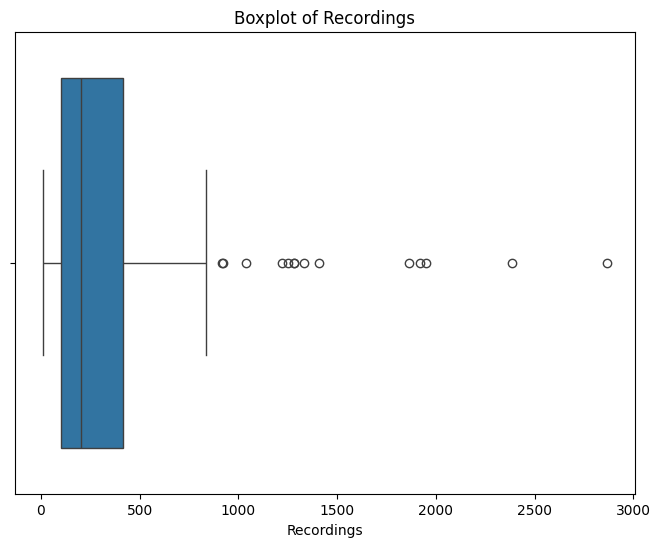

In [52]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df["recordings"])
plt.title('Boxplot of Recordings')
plt.xlabel('Recordings')

min_val = df["recordings"].min()
q1 = df["recordings"].quantile(0.25)
median = df["recordings"].median()
q3 = df["recordings"].quantile(0.75)
max_val = df["recordings"].max()
print("# of recordings for all 145 species")
print(f"Min: {min_val} -- Q1: {q1} -- Median: {median} -- Q3: {q3} -- Max: {max_val}")

plt.show()



Total recording times for all 145 species
Min: 5.68 -- Q1: 60.48 -- Median: 132.48 -- Q3: 362.27 -- Max: 5422.27


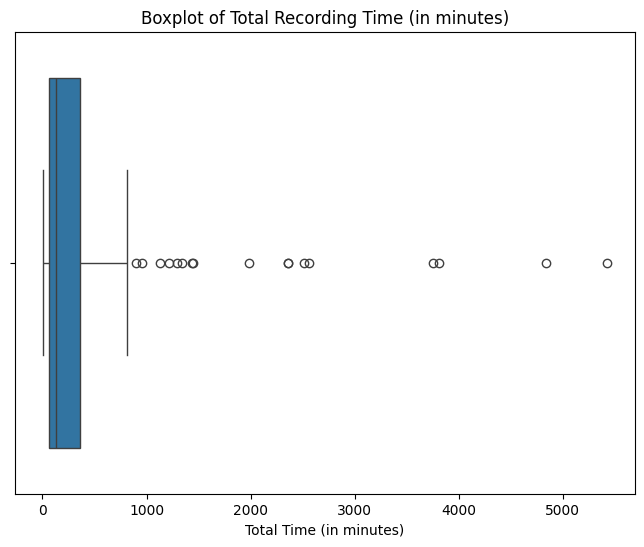

In [53]:
def time_to_minutes(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 60 + m + s / 60

df["total_time_minutes"] = df["total time"].apply(time_to_minutes)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["total_time_minutes"])
plt.title('Boxplot of Total Recording Time (in minutes)')
plt.xlabel('Total Time (in minutes)')

min_val = df["total_time_minutes"].min()
q1 = df["total_time_minutes"].quantile(0.25)
median = df["total_time_minutes"].median()
q3 = df["total_time_minutes"].quantile(0.75)
max_val = df["total_time_minutes"].max()
print("Total recording times for all 145 species")
print(f"Min: {round(min_val, 2)} -- Q1: {round(q1, 2)} -- Median: {round(median, 2)} -- Q3: {round(q3, 2)} -- Max: {round(max_val, 2)}")

plt.show()

Avg recording times for all 145 species (in seconds)
Min: 13 -- Q1: 33.0 -- Median: 46.0 -- Q3: 57.0 -- Max: 370


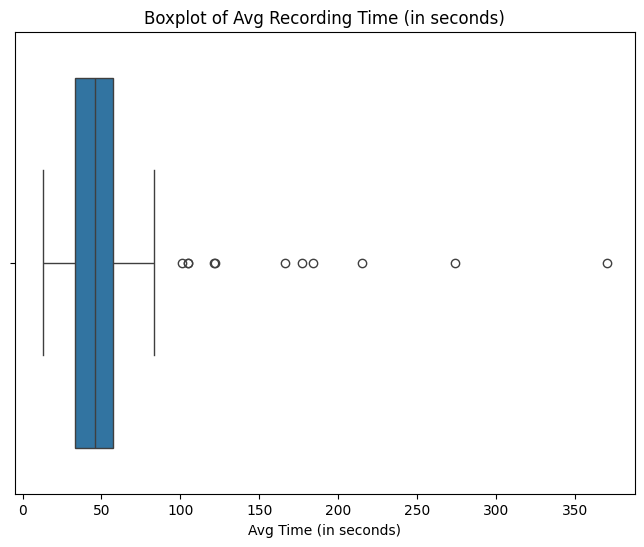

In [54]:
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

df["avg_time_seconds"] = df["avg recording time"].apply(time_to_seconds)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["avg_time_seconds"])
plt.title('Boxplot of Avg Recording Time (in seconds)')
plt.xlabel('Avg Time (in seconds)')

min_val = df["avg_time_seconds"].min()
q1 = df["avg_time_seconds"].quantile(0.25)
median = df["avg_time_seconds"].median()
q3 = df["avg_time_seconds"].quantile(0.75)
max_val = df["avg_time_seconds"].max()
print("Avg recording times for all 145 species (in seconds)")
print(f"Min: {round(min_val, 2)} -- Q1: {round(q1, 2)} -- Median: {round(median, 2)} -- Q3: {round(q3, 2)} -- Max: {round(max_val, 2)}")


plt.show()

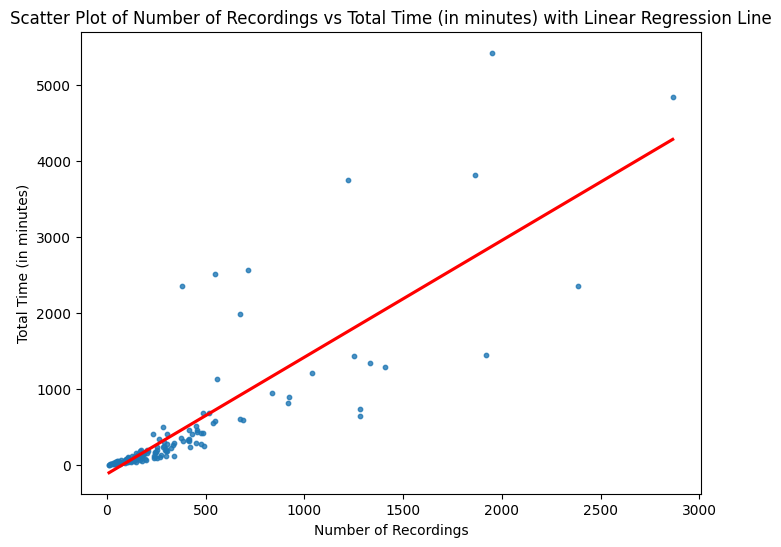

In [55]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df["recordings"], y=df["total_time_minutes"], scatter_kws={'s': 10}, line_kws={"color": "red"}, ci=None)
plt.title('Scatter Plot of Number of Recordings vs Total Time (in minutes) with Linear Regression Line')
plt.xlabel('Number of Recordings')
plt.ylabel('Total Time (in minutes)')
plt.show()


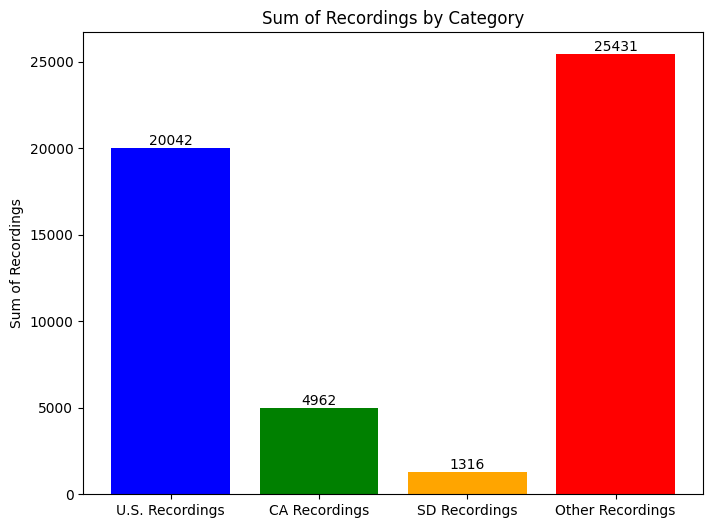

In [56]:
sum_us_recordings = df["U.S. recordings"].sum()
sum_ca_recordings = df["CA recordings"].sum()
sum_sd_recordings = df["SD recordings"].sum()
sum_other_recordings = df["recordings"].sum() - (sum_us_recordings + sum_ca_recordings + sum_sd_recordings)
labels = ['U.S. Recordings', 'CA Recordings', 'SD Recordings', 'Other Recordings']
values = [sum_us_recordings, sum_ca_recordings, sum_sd_recordings, sum_other_recordings]
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom')
plt.title('Sum of Recordings by Category')
plt.ylabel('Sum of Recordings')
plt.show()
